In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [38]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [39]:
print("Shape:", df.shape)
print(df.columns.tolist())
print(df['Attrition'].value_counts())

Shape: (1470, 35)
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [40]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [41]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [42]:
cols=['Attrition','OverTime']
df[cols]=df[cols].replace({'Yes':1,'No':0})
df['Gender']=df['Gender'].map({'Female':0,'Male':1})
df['Over18']=df['Over18'].map({'Y':1})
df.head()

C:\Users\manos\AppData\Local\Temp\ipykernel_16664\2940150458.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols]=df[cols].replace({'Yes':1,'No':0})


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [43]:
numeric_cols=df.select_dtypes(include=['Float64','int64'])
print(numeric_cols)
cat_cols=df.select_dtypes(exclude=['Float64','int64'])
print(cat_cols)

      Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41          1       1102                 1          2              1   
1      49          0        279                 8          1              1   
2      37          1       1373                 2          2              1   
3      33          0       1392                 3          4              1   
4      27          0        591                 2          1              1   
...   ...        ...        ...               ...        ...            ...   
1465   36          0        884                23          2              1   
1466   39          0        613                 6          1              1   
1467   27          0        155                 4          3              1   
1468   49          0       1023                 2          3              1   
1469   34          0        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  Gend

In [44]:
multi_cat_cols = [col for col in cat_cols if col not in ['OverTime', 'Gender', 'Attrition', 'Over18']]
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)


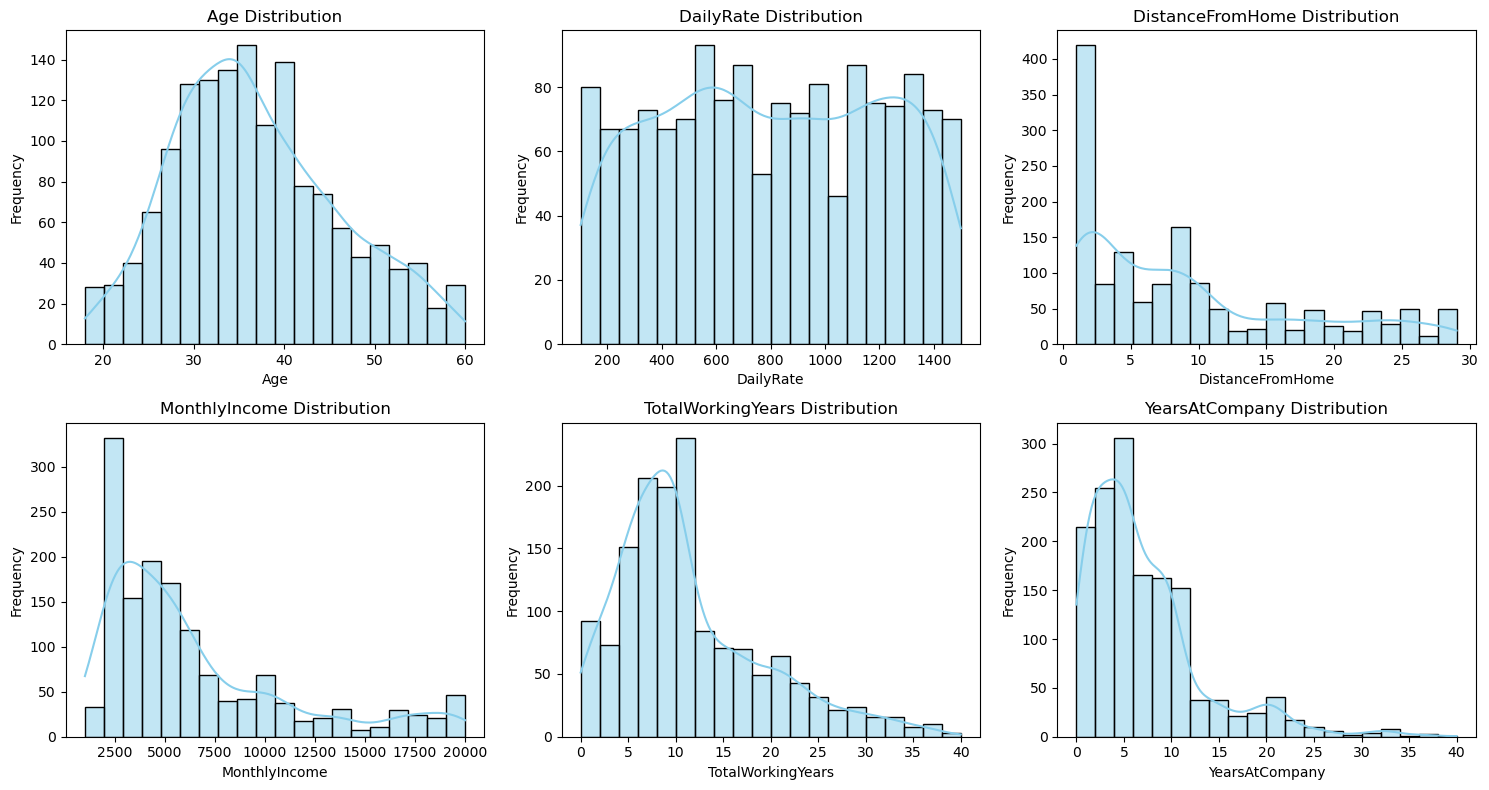

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome',
                'TotalWorkingYears', 'YearsAtCompany']

plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_cols, 1): 
    plt.subplot(2, 3, i)                   
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [46]:
df[numeric_cols].skew()

Age                  0.413286
DailyRate           -0.003519
DistanceFromHome     0.958118
MonthlyIncome        1.369817
TotalWorkingYears    1.117172
YearsAtCompany       1.764529
dtype: float64

In [47]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

skewed_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 
               'TotalWorkingYears', 'YearsAtCompany']



pt = PowerTransformer(method='yeo-johnson')  
df[skewed_cols] = pt.fit_transform(df[skewed_cols])
df[skewed_cols].skew()


Age                 -0.007603
DailyRate           -0.196160
DistanceFromHome    -0.007468
MonthlyIncome        0.032831
TotalWorkingYears   -0.010653
YearsAtCompany      -0.008683
dtype: float64

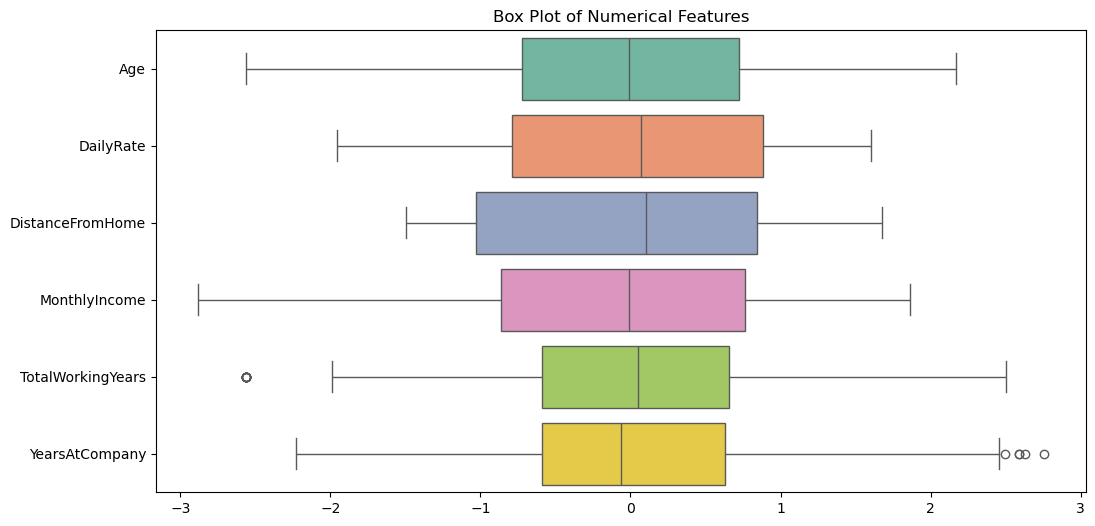

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols], orient='h', palette='Set2')
plt.title('Box Plot of Numerical Features')
plt.show()

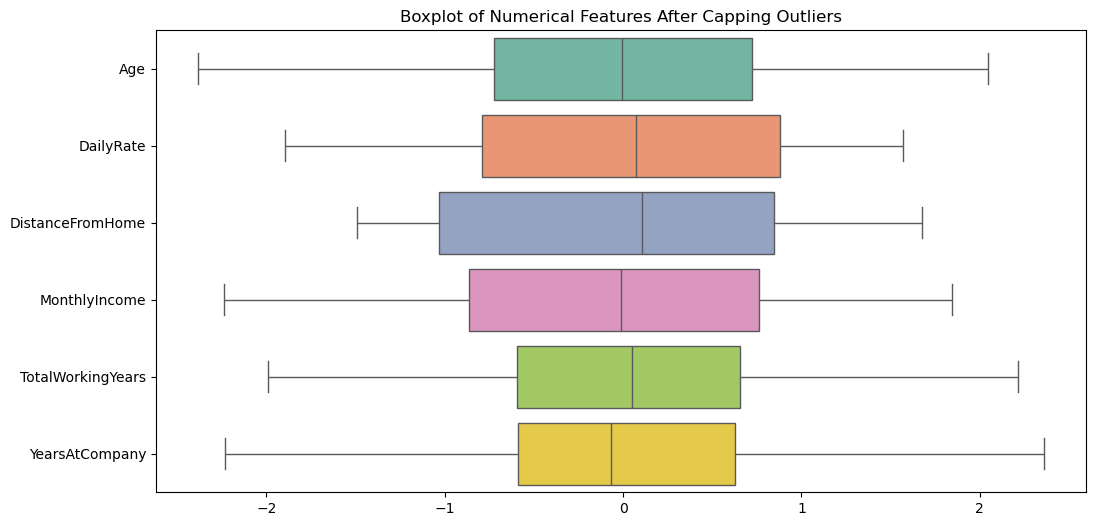

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome',
                'TotalWorkingYears', 'YearsAtCompany']

for col in numeric_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)  


plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols], orient='h', palette='Set2')
plt.title('Boxplot of Numerical Features After Capping Outliers')
plt.show()




In [50]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features)
])

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
pipeline = Pipeline([
    ('preproc', preprocessor),
    ('clf', xgb)
])

In [51]:
param_grid = {
    'clf__learning_rate': [0.05, 0.1],
    'clf__n_estimators': [100, 300],
    'clf__max_depth': [3, 5],
    'clf__subsample': [0.8, 1.0],
    'clf__colsample_bytree': [0.8, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    return_train_score=False
)

In [52]:
grid.fit(X, y)
best_model = grid.best_estimator_

print("Best parameters:", grid.best_params_)
print("Best CV ROC-AUC:", grid.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'clf__colsample_bytree': 1.0, 'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 300, 'clf__subsample': 0.8}
Best CV ROC-AUC: 0.8159683543816229


c:\Users\manos\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:35:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [53]:
y_proba = cross_val_predict(best_model, X, y, cv=cv, method='predict_proba', n_jobs=-1)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print("\nMetrics:")
print(f"Accuracy:  {accuracy_score(y, y_pred):.4f}")
print(f"Precision: {precision_score(y, y_pred):.4f}")
print(f"Recall:    {recall_score(y, y_pred):.4f}")
print(f"F1-score:  {f1_score(y, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y, y_proba):.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred, digits=4))


Metrics:
Accuracy:  0.8639
Precision: 0.6729
Recall:    0.3038
F1-score:  0.4186
ROC-AUC:   0.8151

Classification Report:
               precision    recall  f1-score   support

           0     0.8789    0.9716    0.9230      1233
           1     0.6729    0.3038    0.4186       237

    accuracy                         0.8639      1470
   macro avg     0.7759    0.6377    0.6708      1470
weighted avg     0.8457    0.8639    0.8416      1470



In [54]:
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1198   35]
 [ 165   72]]


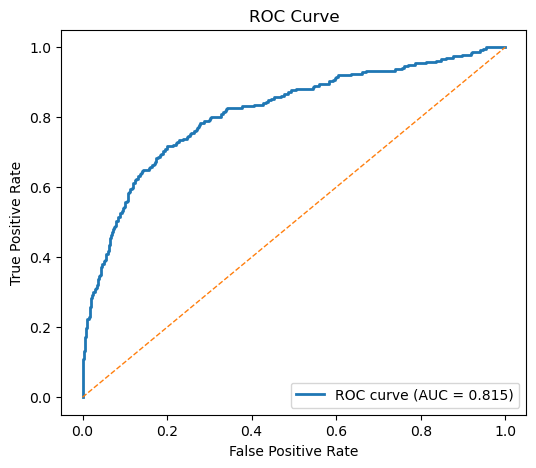

In [55]:
fpr, tpr, _ = roc_curve(y, y_proba)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc_val:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [56]:
import pickle

with open('xgb_attrition_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved as xgb_attrition_model.pkl using pickle")


Model saved as xgb_attrition_model.pkl using pickle
